В домашнем задании нужно решить задачу регрессии. В качестве датасета необходимо взять данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR). На полученных данных построить модель регрессии и дерево решений.

Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz

In [2]:
data = datasets.fetch_california_housing(as_frame=True).frame

Проведите первичный анализ.
a.Проверьте данные на пропуски. Удалите в случае обнаружения.
b.*Нормализуйте один из признаков.

In [3]:
# Проверьте данные на пропуски. Удалите в случае обнаружения
data.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [4]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
# Нормализуйте один из признаков - пусть это будет HouseAge
x = data.iloc [:,1:3]
data.iloc [:,1:3] = (x-x. min ())/ (x. max () - x. min ())
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,0.784314,0.043512,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,0.392157,0.038224,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,1.000000,0.052756,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,1.000000,0.035241,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,1.000000,0.038534,1.081081,565.0,2.181467,37.85,-122.25,3.422


Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое
Обучите модель регрессии на обучающем множестве

In [6]:
def get_score(X,y, random_seed=0, model=None, t_size=0.2, depth=None, minsl = 1):
#    transformer = RobustScaler().fit(X)
#    transformer
#    transformer.transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size, random_state=random_seed)    

    if model is None:
        model = LinearRegression()      
        # Для тестового множества предскажите целевую переменную и сравните с истинным значением, 
        # посчитав точность предсказания модели. Для этого используйте встроенную функцию score
    if model == 'DecisionTreeRegressor' and depth is None:
        model = DecisionTreeRegressor(max_depth=3)
    if model == 'DecisionTreeRegressor' and depth >= 3:
        model = DecisionTreeRegressor(max_depth=depth, min_samples_leaf = minsl)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    s_train = model.score(X_train, y_train)
    s_test = model.score(X_test, y_test)
    return s_train, s_test, model

In [7]:
X = data.loc[:, data.columns != 'MedHouseVal']
y = data[['MedHouseVal']]
s_train, s_test, m = get_score (X, y)
d1 = [{'score train': s_train , 'score test': s_test} ] 
dframe1 = pd.DataFrame(d1, index =['логистическая регрессия'], columns =['score train', 'score test']) 
dframe1

,score train,score test
логистическая регрессия,0.608897,0.594323


In [8]:
X = data.loc[:, data.columns != 'MedHouseVal']
y = data[['MedHouseVal']]
s_train, s_test, m = get_score (X, y, model ='DecisionTreeRegressor' )
d2 = [{'score train': s_train , 'score test': s_test} ] 
dframe2 = pd.DataFrame(d2, index =['дерево решений'], columns =['score train', 'score test']) 
itog = pd.concat([dframe1, dframe2])
itog = itog.sort_values (by = ['score test','score train' ], ascending=False)

itog

,score train,score test
логистическая регрессия,0.608897,0.594323
дерево решений,0.542430,0.498977


In [9]:
# Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.
#  a. Повторите п. 5 для полученной модели
# Подобрал параметр max_depth = 9

X = data.loc[:, data.columns != 'MedHouseVal']
y = data[['MedHouseVal']]
s_train, s_test, m = get_score (X, y, model ='DecisionTreeRegressor', depth =9)
d3 = [{'score train': s_train , 'score test': s_test} ] 
dframe3 = pd.DataFrame(d3, index =['дерево решений, глубина 9'], columns =['score train', 'score test']) 
itog = pd.concat([dframe1, dframe2, dframe3])
itog = itog.sort_values (by = ['score test','score train' ], ascending=False)

itog

,score train,score test
"дерево решений, глубина 9",0.793747,0.667535
логистическая регрессия,0.608897,0.594323
дерево решений,0.542430,0.498977


In [10]:
X = data.loc[:, data.columns != 'MedHouseVal']
y = data[['MedHouseVal']]
s_train, s_test, m = get_score (X, y, model ='DecisionTreeRegressor', depth =9,  minsl= 9)
d4 = [{'score train': s_train , 'score test': s_test} ] 
dframe4 = pd.DataFrame(d4, index =['дерево решений, глубина 9, min_samples_leaf =9'], columns =['score train', 'score test']) 
itog = pd.concat([dframe1, dframe2, dframe3, dframe4])
itog = itog.sort_values (by = ['score test','score train' ], ascending=False)
itog

,score train,score test
"дерево решений, глубина 9, min_samples_leaf =9",0.780426,0.695203
"дерево решений, глубина 9",0.793747,0.667535
логистическая регрессия,0.608897,0.594323
дерево решений,0.542430,0.498977


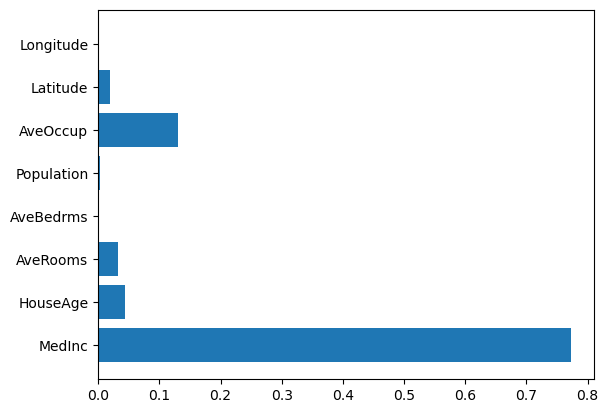

In [11]:
# Оценка важности фичей
# С увеличением глубины изменяются размеры важности переменных
clf = DecisionTreeRegressor(max_depth=5)
clf.fit(X, y)

plt.barh(np.arange(len(clf.feature_importances_)), clf.feature_importances_)
plt.yticks(np.arange(len(X.columns)), X.columns)
plt.show()

[Text(0.5, 0.875, 'MedInc <= 5.029\nsquared_error = 1.338\nsamples = 16512\nvalue = 2.072'),
 Text(0.25, 0.625, 'MedInc <= 3.074\nsquared_error = 0.833\nsamples = 12979\nvalue = 1.733'),
 Text(0.125, 0.375, 'AveRooms <= 0.025\nsquared_error = 0.545\nsamples = 6272\nvalue = 1.35'),
 Text(0.0625, 0.125, 'squared_error = 0.651\nsamples = 2630\nvalue = 1.613'),
 Text(0.1875, 0.125, 'squared_error = 0.383\nsamples = 3642\nvalue = 1.16'),
 Text(0.375, 0.375, 'AveOccup <= 2.373\nsquared_error = 0.836\nsamples = 6707\nvalue = 2.092'),
 Text(0.3125, 0.125, 'squared_error = 1.281\nsamples = 1574\nvalue = 2.792'),
 Text(0.4375, 0.125, 'squared_error = 0.503\nsamples = 5133\nvalue = 1.877'),
 Text(0.75, 0.625, 'MedInc <= 6.82\nsquared_error = 1.218\nsamples = 3533\nvalue = 3.319'),
 Text(0.625, 0.375, 'AveOccup <= 2.74\nsquared_error = 0.891\nsamples = 2453\nvalue = 2.921'),
 Text(0.5625, 0.125, 'squared_error = 0.988\nsamples = 1016\nvalue = 3.413'),
 Text(0.6875, 0.125, 'squared_error = 0.531\ns

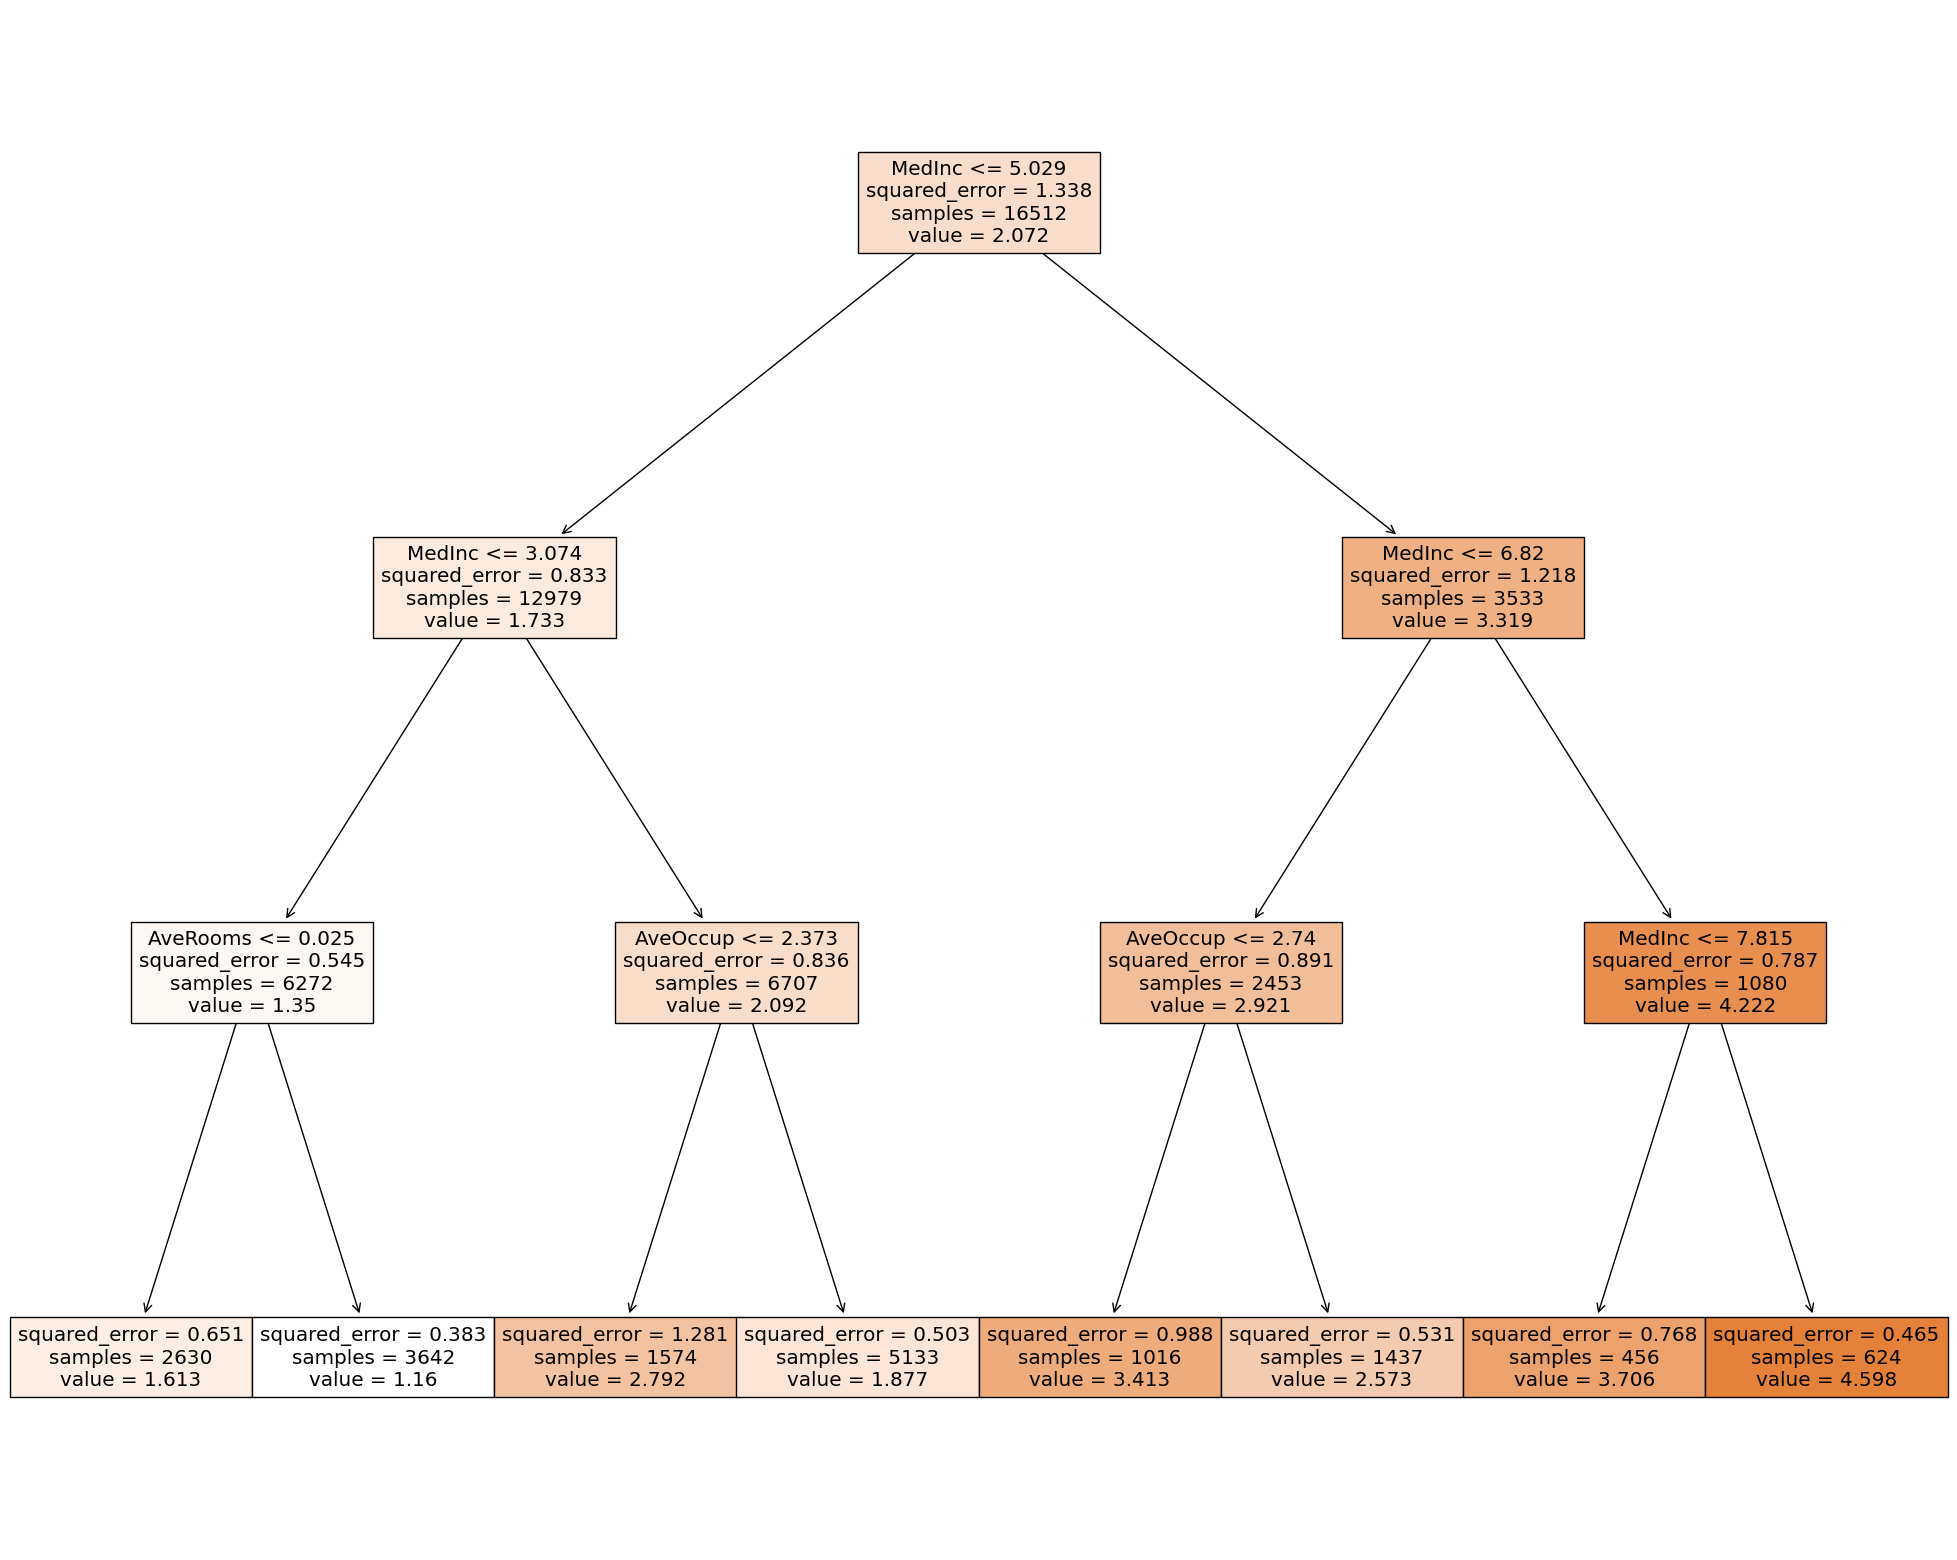

In [12]:
#from sklearn import tree
s_train, s_test, m = get_score (X, y, model ='DecisionTreeRegressor', depth =3,  minsl= 9)
fig = plt.figure(figsize=(25,20))
plot_tree(m, feature_names=X.columns.tolist(), filled=True)
#_ = tree.plot_tree(m, feature_names=X.columns.tolist(), filled=True)

+ Деревья - просты в понимании и интерпретации. Деревья можно визуализировать.
+ Требуют небольшой подготовки данных. Другие методы часто требуют нормализации данных, создания фиктивных переменных и удаления пустых значений. 
+ Дерево решений способно обрабатывать как числовые, так и категориальные данные. Однако реализация scikit-learn на данный момент не поддерживает категориальные переменные.
- Возможно создать смещенные деревья, если доминируют какие-то классы. Поэтому необходимо сбалансировать набор данных перед подгонкой к дереву решений.
- Переобучение